In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau



# READ DATA

In [3]:
# Load the Parkinson's dataset
parkinson_data = pd.read_csv("audio_features_A.csv")

# Extract the features and labels
X = parkinson_data.drop(['name','status'], axis=1) # MFCC feature vectors
y = parkinson_data['status'] # labels (0 = healthy, 1 = Parkinson's)

In [23]:
parkinson_data

,name,status,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,HC_f_a_c,0,-237.286790,139.80032,-84.910150,-164.609800,10.363490,-30.613455,-10.627548,8.624021,-39.487076,-51.682590,-114.157190,-61.415684,-78.853096
1,HC_f_a_c1,0,-229.847210,170.23766,-69.513360,-71.711876,70.451324,79.968990,-32.700950,-43.471924,6.615326,-10.410770,-44.611256,0.288241,-43.802124
2,HC_f_a_f,0,-364.504880,210.13740,-52.943910,-51.138750,56.999660,-18.388283,-59.295757,-102.010155,-110.914980,1.418754,-28.179160,45.492172,-13.232738
3,HC_f_a_g,0,-410.250520,245.09216,-34.262768,-77.332220,41.493572,-27.803658,-144.323090,163.088760,-11.995799,2.871592,-60.357723,-16.053354,-10.531968
4,HC_f_a_g1,0,-393.885650,202.22246,-60.169080,-77.499260,51.307160,-52.065420,44.469800,46.017593,-112.335510,27.981163,-4.511343,16.818808,-69.880585
5,HC_f_a_m,0,-395.420560,268.31284,-43.031740,-62.364360,75.567894,-94.814230,46.428930,34.786423,-146.268770,-51.021057,-50.665150,86.147160,11.703414
6,HC_f_a_p,0,-264.719020,104.29951,-188.122270,-61.006435,99.551370,-25.126837,-4.600727,-70.554985,-83.367290,-49.962982,-0.922279,-6.341867,12.625546
7,HC_f_a_p1,0,-406.675930,243.15906,-27.017950,-55.482555,-22.094345,-85.753390,-75.989570,118.838010,26.638168,-35.176083,-45.414760,-37.706104,-27.192606
8,HC_h_a_a,0,-303.140170,237.92065,30.431650,-95.027460,-59.030700,-90.006040,-138.642820,42.250637,88.829080,-27.320395,-2.771495,-29.399012,-1.213995
9,HC_h_a_a1,0,-256.858860,251.50073,1.310177,-131.864730,-79.564735,18.615051,-95.585350,-36.041573,65.319890,42.932520,-60.804455,-66.427925,-18.584518


# Data Splitting

In [47]:
# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42,stratify=y)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)

# Setting callbacks

In [49]:
# callbacks.EarlyStopping : is a method that allows you to specify an arbitrary 
# large number of training epochs and stop training once the model performance
# stops improving on a hold out validation dataset.

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)


# Reduce learning rate when a metric has stopped improving
plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

# Model Creation

In [65]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),  # Dropout for regularization (adjust as needed)
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),  # Add dropout to the second hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam',  # You can also try other optimizers like SGD, RMSprop, etc.
              loss='binary_crossentropy',  # Use appropriate loss for your problem
              metrics=['accuracy'])
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                896       
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [66]:

BATCH = 32

history = model.fit(X_train, y_train,
                    batch_size=32, epochs=50,
                    validation_data=(X_validation, y_validation),
                    callbacks=[early_stopping, plateau]
                   
                   )


Epoch 1/50
1/1 [==============================] - 1s 508ms/step - loss: 20.3582 - accuracy: 0.5185 - val_loss: 16.2191 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 2/50
1/1 [==============================] - 0s 26ms/step - loss: 21.4167 - accuracy: 0.5556 - val_loss: 14.3911 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 3/50
1/1 [==============================] - 0s 22ms/step - loss: 16.5705 - accuracy: 0.4815 - val_loss: 12.6910 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 17.0490 - accuracy: 0.5926 - val_loss: 11.2117 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 5/50
1/1 [==============================] - 0s 24ms/step - loss: 7.5406 - accuracy: 0.5926 - val_loss: 10.2096 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 6/50
1/1 [==============================] - 0s 24ms/step - loss: 12.5176 - accuracy: 0.5926 - val_loss: 9.1437 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 7/50
1/1 [==============================] - 0s 31ms/step - loss: 11.726

1/1 [==============================] - 0s 15ms/step - loss: 2.5469 - accuracy: 0.9000
Test accuracy: 0.8999999761581421


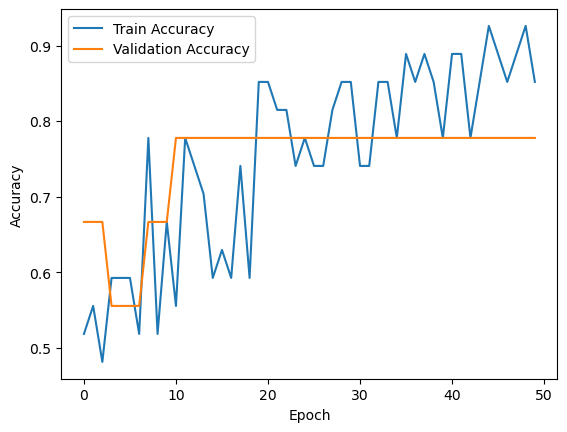

In [67]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
